## FFT 1D

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Signal échantillonné

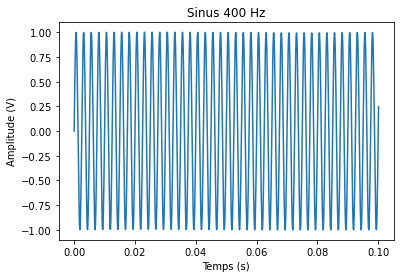

In [2]:
# Paramètres échantillonnage
Fe = 1e4
Npoints = 1001
T = Npoints/Fe
# vecteur temps
t = np.linspace(0,T,Npoints)
# vecteur signal
v = np.sin(2*np.pi*400*t)
# affichage
plt.figure()
plt.title('Sinus 400 Hz')
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude (V)')
plt.plot(t, v)
plt.show()

### FFT

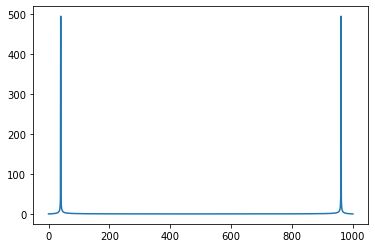

In [3]:
TFv = np.fft.fft(v)
plt.figure()
plt.plot(np.absolute(TFv))
plt.show()

### Décalage d'indice - centrage en F = 0

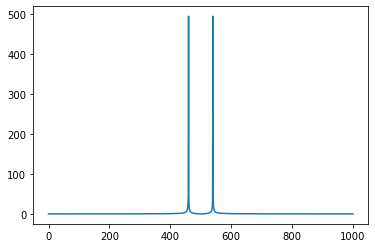

In [4]:
plt.figure()
plt.plot(np.fft.fftshift(np.absolute(TFv)))
plt.show()

### Axe fréquentiel

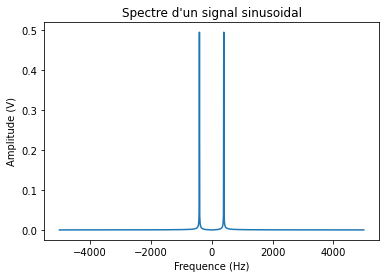

In [5]:
freq = np.linspace(-Fe/2, Fe/2-Fe/(2*Npoints), Npoints)
plt.figure()
plt.plot(freq, np.fft.fftshift(np.absolute(TFv))/Npoints)
plt.title('Spectre d\'un signal sinusoidal')
plt.xlabel('Frequence (Hz)')
plt.ylabel('Amplitude (V)')
plt.show()

## FFT 2D

### Données initiales

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

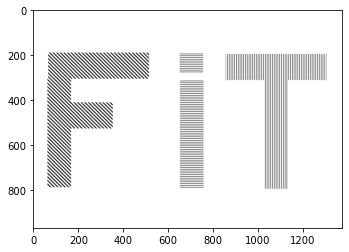

In [7]:
image = Image.open('lettres.png')
plt.imshow(image)
plt.show()

In [8]:
# convert image to numpy array
image_data = np.array(image)
# Get only first layer
image_data = image_data[:,:,0]
h_image = image_data.shape[0]
l_image = image_data.shape[1]
print("H = "+str(h_image)+" / L = "+str(l_image))

H = 968 / L = 1376


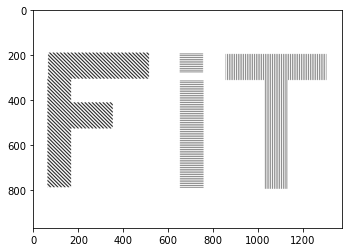

In [9]:
plt.figure()
plt.imshow(image_data, cmap='gray')
plt.show()

### FFT 2D

In [24]:
TFimage = np.fft.fft2(image_data)
mTFimage = np.absolute(TFimage)
print(mTFimage.shape)

(968, 1376)


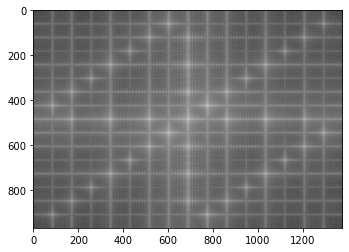

In [25]:
TFimage_shift = np.fft.fftshift(TFimage)
mTFimage_shift = np.absolute(TFimage_shift)
plt.figure()
plt.imshow(np.log(mTFimage_shift), cmap='gray')
plt.show()

### Filtrage / Masquage

In [26]:
new_tf_shift = np.zeros((h_image, l_image), dtype='complex')+1
new_tf_shift[380:480, 720:820] = TFimage_shift[380:480, 720:820]

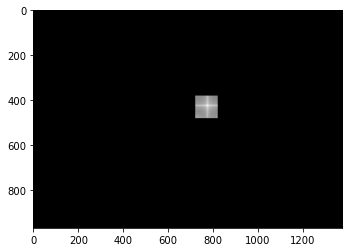

In [29]:
new_mTFimage = np.absolute(new_tf_shift)
plt.figure()
plt.imshow(np.log(new_mTFimage), cmap='gray')
plt.show()

### Reconstruction de l'image

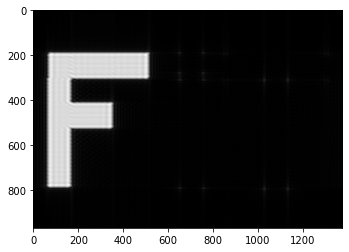

In [30]:
new_tf = np.fft.fftshift(new_tf_shift)
new_image = np.fft.ifft2(new_tf)
plt.figure()
plt.imshow(np.absolute(new_image), cmap='gray')
plt.show()